## Programming Exercise 3

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float



1.26.0


### 3.1 Chroma Keying / Greenscreening

#### 3.1.1

Load the image *camera_frame.png* from the *resources* folder and convert it to floating point format. Display the final image.

(1024, 1024, 3)


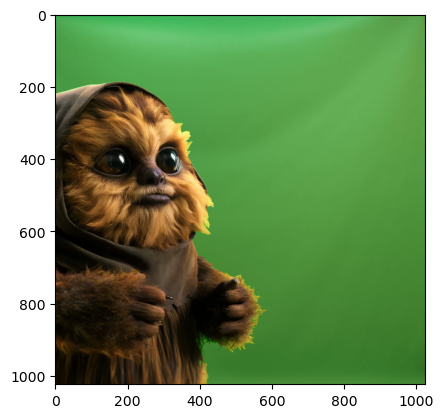

In [4]:
img=io.imread("./resources/camera_frame.png")
img_float=img_as_float(img)
print(img_float.shape)
plt.imshow(img_float)
plt.show()

#### 3.1.2

Display the three color channels of the image in RGB color space.

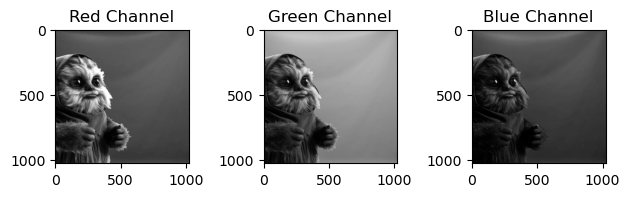

In [22]:
img_float_r=img_float[:,:,0]
img_float_g=img_float[:,:,1]
img_float_b=img_float[:,:,2]
fig,axs=plt.subplots(1,3)
axs[0].imshow(img_float_r,cmap='gray')
axs[0].set_title("Red Channel")
axs[1].imshow(img_float_g,cmap='gray')
axs[1].set_title("Green Channel")
axs[2].imshow(img_float_r,cmap='gray')
axs[2].set_title("Blue Channel")
plt.imshow(img_float_b,cmap='gray')
plt.tight_layout()
plt.show()

#### 3.1.3

The RGB values of different tones of green are not intuitive and make it difficult to identify foregroud and background pixels based on their RGB color values. The HSV color space is much more intuitive and simplifies identification of different color tones. Write a function `rgb2hsv(image_rgb)` that converts the RGB pixel values in the input image `image_rgb` to HSV color space. Return the image in HSV color space.

Transfer the original image to HSV color space and display the individual channels.

*Hint: RGB to HSV color space conversion is described on Pages 3-33 - 3-35 in the lecture notes.*

[[0.36507937 0.36507937 0.36507937 ... 0.81927711 0.81927711 0.81927711]
 [0.36507937 0.36507937 0.36507937 ... 0.81927711 0.81927711 0.81927711]
 [0.36378205 0.36378205 0.36378205 ... 0.81927711 0.81927711 0.81927711]
 ...
 [0.10714286 0.1        0.11764706 ... 0.80357143 0.80357143 0.80357143]
 [0.10714286 0.1        0.11764706 ... 0.80357143 0.80357143 0.80357143]
 [0.10714286 0.1        0.11764706 ... 0.80357143 0.80357143 0.80357143]]


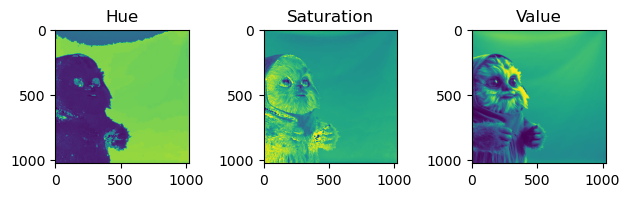

In [ ]:

def rgb2hsv(image_rgb):
    r,g,b=image_rgb[:,:,0],image_rgb[:,:,1],image_rgb[:,:,2]
    v=np.max(image_rgb,axis=-1)
    # v1=np.maximum(np.maximum(r,g),b)
    min_rgb=np.min(image_rgb,axis=-1)
    h=np.zeros(v.shape)
    s=np.zeros(v.shape)
    v_zero_mask=v>0
    s[v_zero_mask]=(v[v_zero_mask]-min_rgb[v_zero_mask])/v[v_zero_mask]
    gray_mask=(r==g)&(g==b)
    h[gray_mask]=0
    r_mask,g_mask,b_mask=(v==r)&~gray_mask,(v==g)&~gray_mask,(v==b)&~gray_mask
    h[r_mask]=(g[r_mask]-b[r_mask])/(r[r_mask]-np.minimum(g[r_mask],b[r_mask]))
    h[g_mask]=2+((b[g_mask]-r[g_mask])/(g[g_mask]-np.minimum(r[g_mask],b[g_mask])))
    h[b_mask]=4+((r[b_mask]-g[b_mask])/(b[b_mask]-np.minimum(r[b_mask],g[b_mask])))
    h=(h/6)%1
    return h,s,v

h,s,v=rgb2hsv(img)
print(np.count)
fig,axs=plt.subplots(1,3)
axs[0].imshow(h)
axs[0].set_title("Hue")
axs[1].imshow(s)
axs[1].set_title("Saturation")
axs[2].imshow(v)
axs[2].set_title("Value")
plt.tight_layout()
plt.show()

#### 3.1.4

Write a function `chroma_key(image_rgb, image_background, hue_range, saturation_range, value_range)` that identifies regions in the original image `image_rgb` as background if their pixel values are within a given `hue_range = (min, max)`, and have a minimum saturation `min_saturation` and value `min_value`. Create a chroma keyed image by replacing pixels identified as background by the pixel values in the given background image `image_background`. Return the chroma keyed image.

Select the parameters for background identification to replace the green background in the original image. As background, load the image *weather_background.png* from the resources folder and convert it to floating point format. Display the chroma keyed image.

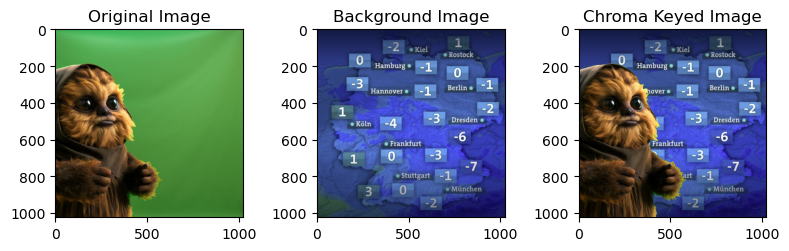

In [31]:
def chroma_key(image_rgb,image_background,hue_range,saturation_range,value_range):
    h_image_rgb,s_image_rgb,v_image_rgb=rgb2hsv(image_rgb)
    hue_mask=(h_image_rgb>=hue_range[0]) & (h_image_rgb<=hue_range[1])
    saturation_mask=(s_image_rgb>=saturation_range[0]) & (s_image_rgb<=saturation_range[1])
    value_mask=(v_image_rgb>=value_range[0]) & (v_image_rgb<=value_range[1])
    total_mask=hue_mask&saturation_mask&value_mask
    output=image_rgb.copy()
    output[total_mask]=image_background[total_mask]
    return output
image_rgb=img_as_float(io.imread("./resources/camera_frame.png"))
image_background=img_as_float(io.imread("./resources/weather_background.png"))
greenscreen_image=chroma_key(image_rgb,image_background,(0.2,0.5),(0.3,1.0),(0.3,1.0))
fig,ax=plt.subplots(1,3,figsize=(8,8))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(image_background)
ax[1].set_title("Background Image")
ax[2].imshow(greenscreen_image)
ax[2].set_title("Chroma Keyed Image")
plt.tight_layout()
plt.show()
    